In [1]:
import h3pandas
import geopandas as gpd
import pandas as pd

In [2]:
birds = pd.read_csv("../../ideas/birds/PFW_all_2021_2023_June2023_Public/PFW_all_2021_2023_June2023_Public.csv")

In [3]:
birds_gdf = gpd.GeoDataFrame(birds, geometry=gpd.points_from_xy(birds.LONGITUDE, birds.LATITUDE))
birds_gdf = birds_gdf.set_crs('epsg:4326')

In [4]:
us_states = gpd.read_file("../../ideas/Esri/USA_States_Generalized.geojson")

In [5]:
# usa = countries[countries["COUNTRY"] == "United States"]
washington = us_states[us_states["STATE_NAME"] == "Washington"]

In [6]:
birds_clip = gpd.clip(birds_gdf, washington)

In [7]:
crows = birds_clip[birds_clip["SPECIES_CODE"] == "amecro"]

In [8]:
rc_kinglet = birds_clip[birds_clip["SPECIES_CODE"] == "ruckin"]

<Axes: >

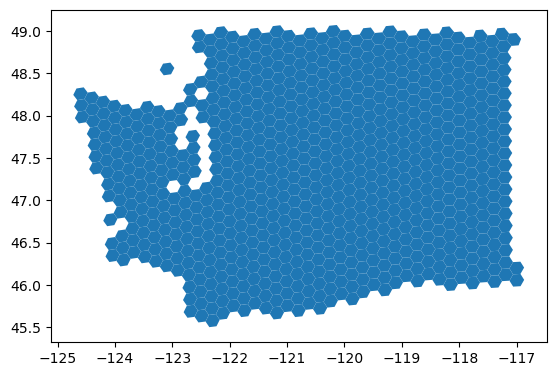

In [9]:
resolution = 5
hexagons = washington.h3.polyfill_resample(resolution)
hexagons.plot()

In [10]:
hexagons["count"] = 0
for i in range(rc_kinglet.shape[0]):
    birds = rc_kinglet["geometry"].values[i]
    update_bools = hexagons.intersects(birds)
    hexagons.loc[update_bools, "count"] = hexagons.loc[update_bools, "count"] + 1

In [11]:
hexagons = hexagons[hexagons["count"] != 0]

In [12]:
m = washington.explore(tiles="CartoDB positron", tooltip=False)
hexagons.explore(m=m, tooltip=False, column="count", cmap="OrRd")